## Perceptron algorithm 

The perceptron is a simple supervised machine learning algorithm and one of the earliest **neural network** architectures. It was introduced by Rosenblatt in the late 1950s, and was made a series of theoretical studies by Novikoff, Minsky and Papert. A perceptron represents a **binary linear classifier** that maps a set of training examples (of $d$ dimensional input vectors) onto binary values using a $d-1$ dimensional hyperplane.

The perceptron as follows.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^i = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a binary target variable, $y^{(i)} \in \{-1,1\}$

The perceptron is a very simple neural network:
- it has a loss function $L(\boldsymbol{w}, b) = - \sum_{\boldsymbol{x^{(i)}} \in M} (y^{(i)}(\boldsymbol{w} \cdot \boldsymbol{x^{(i)}} + b))$, $M$ represents a set of misclassification point
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$
- it has a real-valued bias $b$
- it uses the Heaviside step function as its activation function

* * *
A perceptron is to find the parameters $\boldsymbol{w}$ and $b$ to solve the minimization of the loss function: $\min_{\boldsymbol{w},b}L(\boldsymbol{w}, b) = - \sum_{\boldsymbol{x^{(i)}} \in M} (y^{(i)}(\boldsymbol{w} \cdot \boldsymbol{x^{(i )}} + b))$. It trained using **stochastic gradient descent**. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Input: $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$; learning rate $\eta  (0 < \eta \leq 1)$

**Output: $\boldsymbol{w}$, $b$; Perceptron Model $f(\boldsymbol{x}) = sign(\boldsymbol{w} \cdot \boldsymbol{x} + b)$

**Step 0: ** Initialize the weight vector and bias with zeros (or small random values).
* * *

**Step 1: ** Choose $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$ from dataset
* * *

**Step 2: ** Compute the weight updates using the stochastic gradient descent


$$\nabla_{\boldsymbol {w}} L(\boldsymbol{w}, b) =  - \sum_{\boldsymbol{x^{(i)}} \in M} (y^{(i)} \boldsymbol{x^{(i )}})$$

$$\nabla_{b} L(\boldsymbol{w}, b) =  - \sum_{\boldsymbol{x^{(i)}} \in M} y^{(i)}$$
* * *

**Step 3: ** Select a misclassification point $(\boldsymbol{x}^{(i)}, y^{(i)})$  randomly and update the weights and bias

$$\boldsymbol{w} \gets \boldsymbol{w} + \eta y^{(i)}\boldsymbol{x^{(i)}}$$

$$b \gets b  + \eta y^{(i)}$$
where $\eta  (0 < \eta \leq 1)$ is the learning rate.
***

**Step 4: ** Goto Step 2, until there is none misclassfication point in dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
np.random.seed(123)

# matplotlib inline

## Dataset

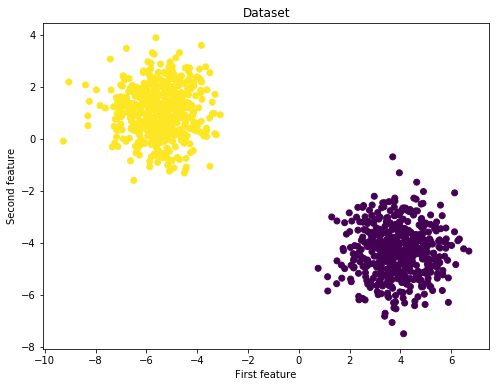

In [4]:
X, y = make_blobs(n_samples=1000, centers=2)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [5]:
y_true = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y_true)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape})')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1))
Shape X_test: (250, 2)
Shape y_test: (250, 1)


## Perceptron model class

In [6]:
class Perceptron():

    def __init__(self):
        pass

    def train(self, X, y, learning_rate=0.05, n_iters=100):
        n_samples, n_features = X.shape

        # Step 0: Initialize the parameters
        self.weights = np.zeros((n_features,1))
        self.bias = 0

        for i in range(n_iters):
            # Step 1: Compute the activation
            a = np.dot(X, self.weights) + self.bias

            # Step 2: Compute the output
            y_predict = self.step_function(a)

            # Step 3: Compute weight updates
            delta_w = learning_rate * np.dot(X.T, (y - y_predict))
            delta_b = learning_rate * np.sum(y - y_predict)

            # Step 4: Update the parameters
            self.weights += delta_w
            self.bias += delta_b

        return self.weights, self.bias

    def step_function(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])[:, np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.step_function(a)

## Initialization and training the model

In [7]:
p = Perceptron()
w_trained, b_trained = p.train(X_train, y_train,learning_rate=0.05, n_iters=500)

## Testing

In [8]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print(f"training accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test)) * 100}%")

training accuracy: 100.0%
test accuracy: 100.0%


## Visualize decision boundary

In [9]:
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()

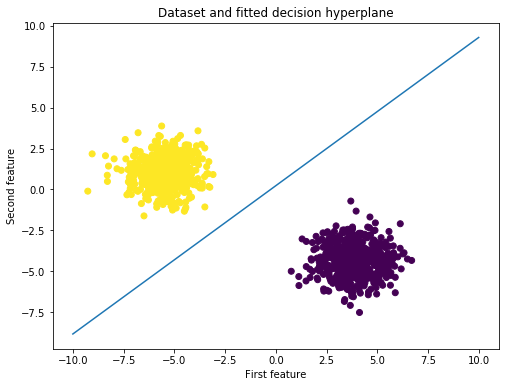

In [10]:
plot_hyperplane(X, y, w_trained, b_trained)